# Multivariate Data Analysis Exercises

This is the second exercise notebook you are going to work on in this course. The notebook, we will ask you to write and execute your own code. Questions involved covers concepts of summary statistics, univariate, bivariate and multivariate analysis. Questions will be similar to what is discussed in Labs and Practices. Dataset used will be similar to what you have seen in lab and practice notebook. 

In this exercise notebook, you will be dealing with housing dataset. Be sure to follow the directions carefully. Write as well as execute code in the designated cells and save the file.

**Question 1**: Read in the file `housing.txt` under the `datasets/housing/` directory. Name this data frame "`housing_data`".

In [16]:
housing = read.table("../../../datasets/housing/housing.txt",header=FALSE)
head(housing)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


The dataset doesn't have column headers. Since this is a small dataset we can add the names manually. If the dataset contains few hundreds of columns then we have process the input file to automatically get the names.

**Question 2**: Now use the read me file in `datasets/housing/` for getting column names of housing_data. The column names are listed under attribute information heading in that file. Read the names into a vector names `headers`. Assign the names in headers as names to housing_data columns.

You can open the file by going to your tab with JupyterHub navigation and clicking the course title, then `datasets`

In [17]:
names(housing) <- c("CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV")
head(housing)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Of the 14 varaibles in the dataset, MEDV is the dependent variable while the other 13 are possible independent variables.  MEDV reports the median value of owner-occupied homes. The independent variables might help to explain the variation in median value across tracts.

Before we get into multivariate analysis we should see how data is distributed for each variable. 

**Question 3: ** Draw histograms for all 14 variables using grid.arrange() function. Observe how the data is distributed. Do you see any interesting patters of data distribution?

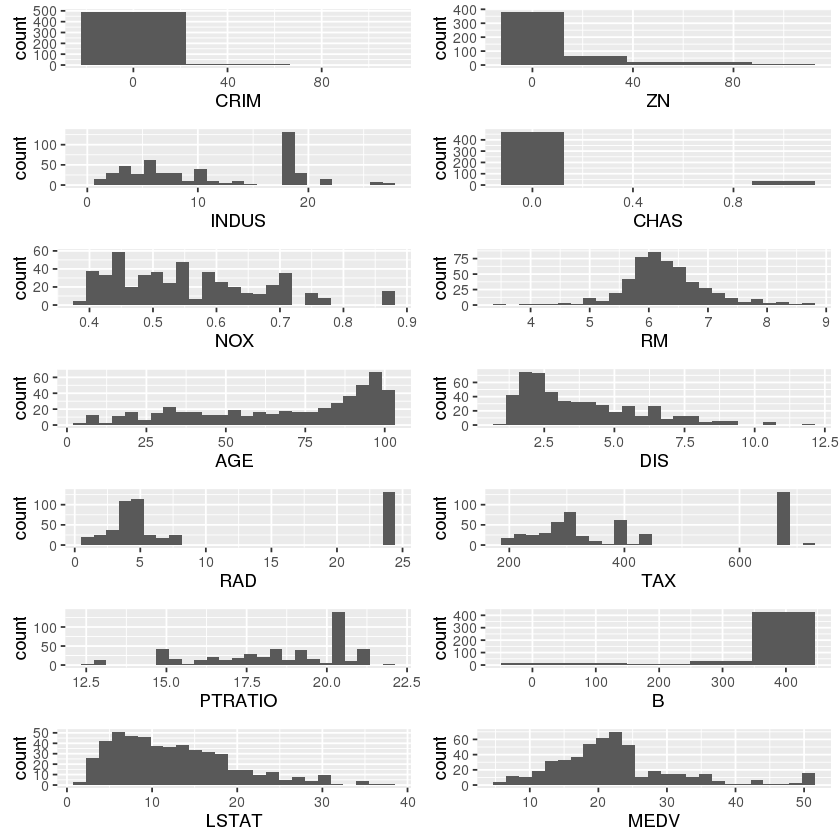

In [26]:
require(gridExtra)
require(ggplot2)
grid.arrange(
             qplot(housing$CRIM,bins = 3,xlab='CRIM'),
	         qplot(housing$ZN,bins = 5,xlab='ZN'),
             qplot(housing$INDUS,bins = 25,xlab='INDUS'),
             qplot(housing$CHAS,bins = 5,xlab='CHAS'),
             qplot(housing$NOX,bins = 25,xlab='NOX'),
             qplot(housing$RM,bins = 25,xlab='RM'),
             qplot(housing$AGE,bins = 25,xlab='AGE'),
             qplot(housing$DIS,bins = 25,xlab='DIS'),
             qplot(housing$RAD,bins = 25,xlab='RAD'),
             qplot(housing$TAX,bins = 25,xlab='TAX'),
             qplot(housing$PTRATIO,bins = 25,xlab='PTRATIO'),
             qplot(housing$B,bins = 5,xlab='B'),
             qplot(housing$LSTAT,bins = 25,xlab='LSTAT'),
             qplot(housing$MEDV,bins = 25,xlab='MEDV'),
             ncol = 2)


** Save your notebook **

In [27]:
# SAVE NOTEBOOK BEFORE RUNNING CELL
library(git2r)
repo <- repository('../../..')
add(repo, 'Exercises.ipynb')   
commit(repo,"This is my first commit, Activities 1-3")

[f6f7806] 2016-10-04: This is my first commit, Activities 1-3

**Question 4**:   Identify the variables which have a correlation of $\pm 0.45$  with MEDV. 

Hint: cor.test() gives lot of statistics. The only thing we are interested in right now is the correlation coefficient. So you can print exactly what you want instead of bunch of information it returns. For eg: use the command as "cor.test(variable A,variable B)[4]". The value at 4th position in the list command returns as output contains the correletaion coefficient. It keeps your output consice.

In [35]:
#cor(housing)
#INDUS,RM,TAX,PRATIO,LSTAT
cor.test(housing$MEDV,housing$INDUS)[4]
cor.test(housing$MEDV,housing$RM)[4]
cor.test(housing$MEDV,housing$TAX)[4]
cor.test(housing$MEDV,housing$PTRATIO)[4]
cor.test(housing$MEDV,housing$LSTAT)[4]

$estimate
       cor 
-0.4837252

$estimate
      cor 
0.6953599

$estimate
       cor 
-0.4685359

$estimate
       cor 
-0.5077867

$estimate
       cor 
-0.7376627

**Question 5**: Draw scatter plots between MEDV and the independent variables you found in Question 4 with using ggplot2 library and grid.arrange() function in gridExtra library. 

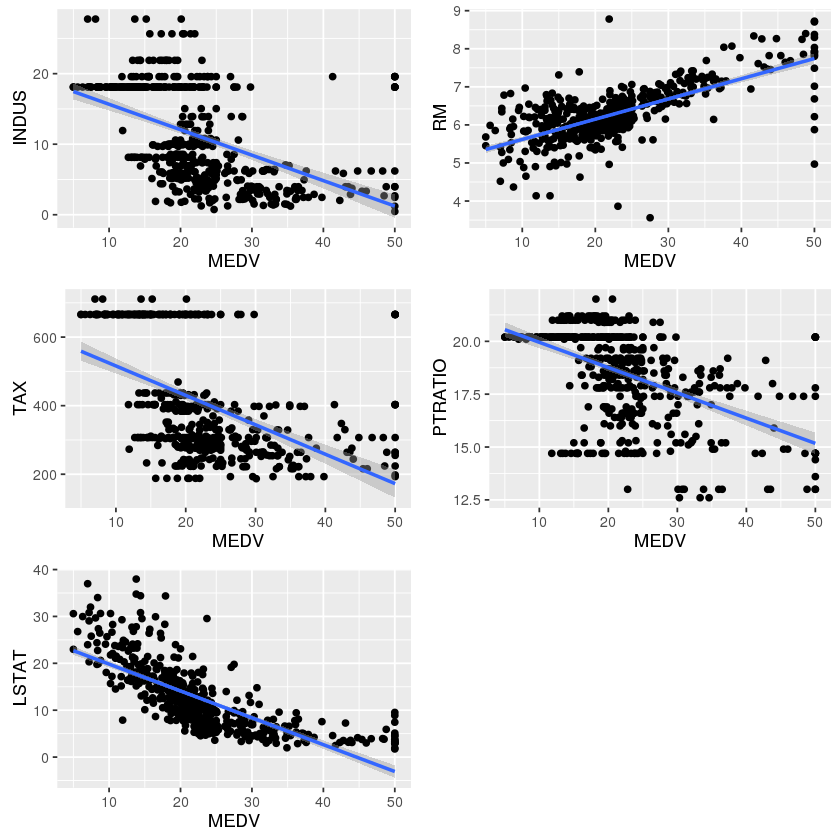

In [38]:
grid.arrange(
    ggplot(housing, aes(x=MEDV,y=INDUS)) + xlab("MEDV")+ ylab("INDUS") + 
    geom_point() + geom_smooth(method=lm),
    ggplot(housing, aes(x=MEDV,y=RM)) + xlab("MEDV")+ ylab("RM") + 
    geom_point() + geom_smooth(method=lm),
    ggplot(housing, aes(x=MEDV,y=TAX)) + xlab("MEDV")+ ylab("TAX") + 
    geom_point() + geom_smooth(method=lm),
    ggplot(housing, aes(x=MEDV,y=PTRATIO)) + xlab("MEDV")+ ylab("PTRATIO") + 
    geom_point() + geom_smooth(method=lm),
    ggplot(housing, aes(x=MEDV,y=LSTAT)) + xlab("MEDV")+ ylab("LSTAT") + 
    geom_point() + geom_smooth(method=lm),
    ncol=2)


````

    Answer for question 5 (pairs of variables)
    
````

** Save your notebook**

In [39]:
# SAVE NOTEBOOK BEFORE RUNNING CELL
library(git2r)
repo <- repository('../../..')
add(repo, 'Exercises.ipynb')   
commit(repo,"This is my second commit, Activities 4-5")

[22aa693] 2016-10-04: This is my second commit, Activities 4-5

**Question 6**:  
A. Create a linear regression between MEDV and the most correlated variable in the data set.   
B. Then plot the linear regression over the scatter plot.


Call:
lm(formula = MEDV ~ LSTAT, data = housing)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
LSTAT       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


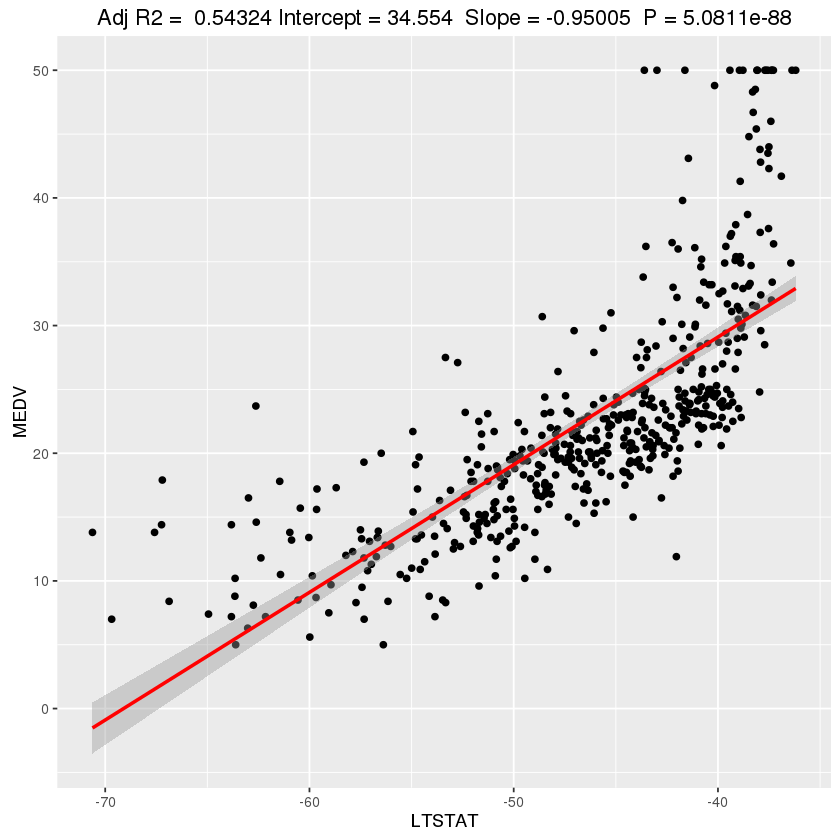

In [44]:
#Most coorelated variable is LSTAT with coorelation of -0.73
fit <- lm(MEDV ~ LSTAT, data=housing)
summary(fit)
ggplot(housing, aes_string(
                x = (-0.95005*housing$LSTAT + 34.55 ), 
                y = names(fit$model)[1]
       )
  ) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)
                )
       , x = "LTSTAT"
      ) 

**Question 7**:  
A. Create a linear multiple regression between MEDV and all the variables identified in Question 4.    
B. Then plot the linear regression over the scatter plot, using the regression variables and coefficients for the X-access.


Call:
lm(formula = MEDV ~ INDUS + RM + TAX + PTRATIO + LSTAT, data = housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2469  -3.0629  -0.9032   1.7415  30.3402 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.517713   3.974975   4.407 1.28e-05 ***
INDUS        0.056975   0.052699   1.081   0.2802    
RM           4.625169   0.430651  10.740  < 2e-16 ***
TAX         -0.003537   0.002128  -1.662   0.0971 .  
PTRATIO     -0.876154   0.125376  -6.988 8.94e-12 ***
LSTAT       -0.559005   0.048846 -11.444  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.225 on 500 degrees of freedom
Multiple R-squared:  0.6804,	Adjusted R-squared:  0.6772 
F-statistic: 212.9 on 5 and 500 DF,  p-value: < 2.2e-16


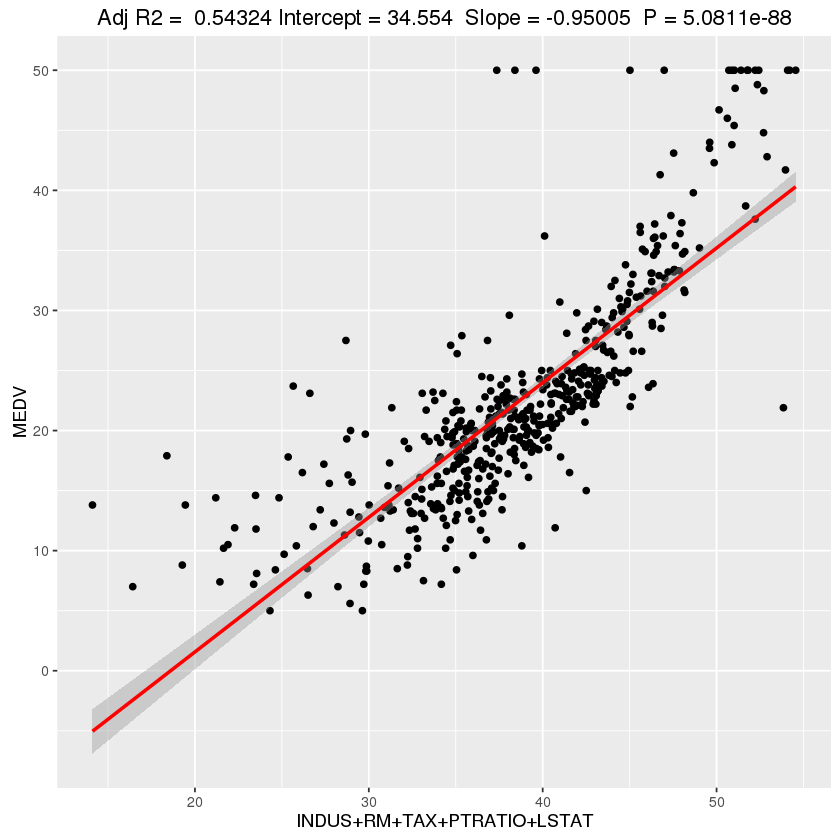

In [50]:
# Execute your code for question 9 here
# -------------------------------------
fit4 <- lm(MEDV ~ INDUS+RM+TAX+PTRATIO+LSTAT, data=housing)
summary(fit4)
ggplot(housing, aes_string(
                x = (0.056975*housing$INDUS+4.625169*housing$RM-0.003537*housing$TAX-0.559005*housing$LSTAT + 17.517713), 
                y = names(fit$model)[1]
       )
  ) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)
                )
       , x = "INDUS+RM+TAX+PTRATIO+LSTAT"
      ) 

# SAVE YOUR NOTEBOOK

The next cell is the final commit of work!

In [ ]:
# SAVE NOTEBOOK BEFORE RUNNING CELL
library(git2r)
repo <- repository('../../..')
add(repo, 'Exercises.ipynb')   # Yes we add it again... we have another round of changes to record
commit(repo,"Exercises Complete")
summary(repo)